## Classification Workshop: Wines data set

In this workshop we used a well-known data set called 'wines' which includes the chemical characteristics of some different wines. Thisdata set is part of the materials provided at UC Irvine Machine Learning Repository.


The file is well documented and all info can be found in the following url: https://archive.ics.uci.edu/ml/datasets/Wine

**NOTE**: As I had some problems loading the data from the original source, I turned to an alternative source in GitHub.


In [11]:
wines = read.csv("https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv", header=TRUE)
head(wine)

Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


The original data set did not indentify the variables. However, they were described in the documentation. The first dimension 'Wine' indicated the type of wine (i.e., it is the variable providing the type which will allow us to check the classification). This will determine later the columns we will take in order to fit the model:

* To fit C.50 model, we will first load the library
* With 'model' we ask to characterise column 'Wine' in terms of the rest of the variables. It will try to find a division in the set that will explain the complete set.
* Given that C.50 requires the result to be a factor, we apply as.factor to column 'Wine'.

In [22]:
library(C50)
model = C5.0 (Wine ~., data=wines)

In [23]:
wines$Wine = as.factor (wines$Wine)
summary(wines)

 Wine      Alcohol        Malic.acid         Ash             Acl       
 1:59   Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60  
 2:71   1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20  
 3:48   Median :13.05   Median :1.865   Median :2.360   Median :19.50  
        Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49  
        3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50  
        Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00  
       Mg            Phenols        Flavanoids    Nonflavanoid.phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      

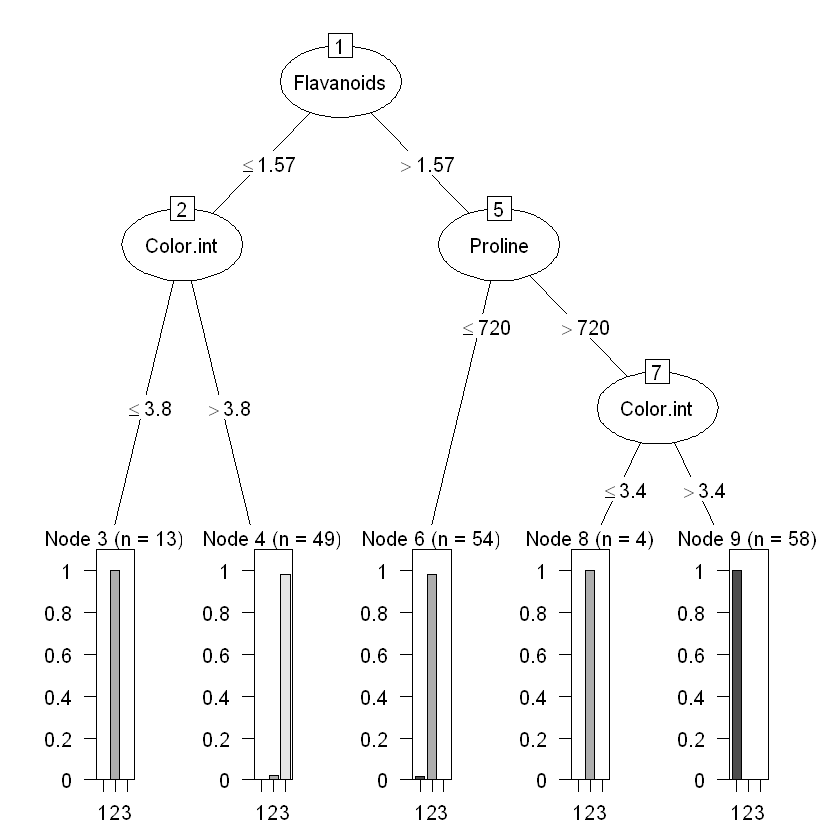

In [24]:
model = C5.0(Wine ~., data=wines)
plot(model)

#### Plot interpretation:

In the plot above, we can see that wines from Type 1 are mostly in Node 9. If we take the values of the variables, we can see that:

* Wines of **Type 1** are mostly in Node 9: these are wines where Proanth variable are above 1.57, Proline is above 720 and OD280/OD315 values of diluted wines is higher than 3.4. There is only one wine in this group with diffetent characteristics and it is classified in Node 6 (i.e., the Proline is bellow 720)
* Wines from **Type 2** are more diverse, and have been classified in different Nodes - maiunly, Nodes 3, 6 and 8.
* Finally, wines from **Type 3** are all classified in Node 4.

Let`s try to **make some interpretation from all this**. We could infer that this classification has been done in a set of wines coming from three different wineries. We could conclude that the third winery produces very similar wines, with very similar characteristics which puts them in the same Node.

On the contrary, the second winery has more variety of wines, at least three different types of wines. The first winery offers a very even type of wines, all but one wine, whose characteristics put them in a different node. Maybe the special vintage from the house? We would love to try it... cheers!